# Use USGS API to get all earthquakes with Magnitude 4 or higher from 2016-01-01 to 2019-10-01. Your notebook code should show how you got the dataset. 0) Show all your code to acquire the dataset in your notebook.

In [367]:
import requests
import pandas as pd
import io

response2016 = requests.get("https://earthquake.usgs.gov/fdsnws/event/1/query?format=csv&starttime=2016-01-01&endtime=2016-12-31&minmagnitude=4").content
response2016df = pd.read_csv(io.StringIO(response2016.decode('utf-8')))

In [368]:
response2017 = requests.get("https://earthquake.usgs.gov/fdsnws/event/1/query?format=csv&starttime=2017-01-01&endtime=2017-12-31&minmagnitude=4").content
response2017df = pd.read_csv(io.StringIO(response2017.decode('utf-8')))

In [369]:
response2018 = requests.get("https://earthquake.usgs.gov/fdsnws/event/1/query?format=csv&starttime=2018-01-01&endtime=2018-12-31&minmagnitude=4").content
response2018df = pd.read_csv(io.StringIO(response2018.decode('utf-8')))

In [370]:
response2019 = requests.get("https://earthquake.usgs.gov/fdsnws/event/1/query?format=csv&starttime=2019-01-01&endtime=2019-10-01&minmagnitude=4").content
response2019df = pd.read_csv(io.StringIO(response2019.decode('utf-8')))

In [371]:
fulldf = pd.concat([response2016df, response2017df, response2018df, response2019df])

In [372]:
# Preprocessing Data
# Considering only Earthquake type
earthquakeDf = fulldf[fulldf['type']== "earthquake"]

In [373]:
# Saving final Dataset 'earthquakeDf' to external csv file for uploading to iCollege
earthquakeDf.to_csv('PotlaUmaraj_Earthquake_Data.csv')

# 1) Use describe to get the basic statistics of all the columns (5 points)

In [374]:
print(earthquakeDf.describe())

           latitude     longitude         depth           mag         nst  \
count  52832.000000  52832.000000  52832.000000  52832.000000  337.000000   
mean       1.892520     34.103971     94.220178      4.526353   47.314540   
std       28.966467    124.276023    147.893199      0.397919   35.342401   
min      -79.983700   -179.998600     -0.930000      4.000000    4.000000   
25%      -19.515975    -74.368650     10.000000      4.300000   23.000000   
50%       -3.352450     94.037950     33.885000      4.500000   37.000000   
75%       24.356800    141.917750    106.130000      4.700000   64.000000   
max       86.996400    179.999300    690.950000      8.200000  289.000000   

                gap          dmin           rms  horizontalError  \
count  51987.000000  51942.000000  52832.000000     52390.000000   
mean     110.729047      3.712220      0.827369         8.754285   
std       51.022851      4.735474      0.262199         3.651184   
min        7.000000      0.000000 

# 2) Get the top 10 earthquakes by magnitude (5 points)

In [375]:
top10Earthquakes = earthquakeDf.sort_values(by = 'mag', ascending = False)
top10Earthquakes.head(10)

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
4490,2017-09-08T04:49:19.180Z,15.0222,-93.8993,47.39,8.2,mww,NaN,22.0,0.944,1.22,...,2019-09-12T03:25:23.535Z,"101km SSW of Tres Picos, Mexico",earthquake,6.2,3.7,0.058,29.0,reviewed,us,us
6200,2018-08-19T00:19:40.670Z,-18.1125,-178.1530,600.00,8.2,mww,NaN,13.0,3.630,0.79,...,2019-08-19T06:18:42.402Z,"286km NNE of Ndoi Island, Fiji",earthquake,9.6,1.9,0.045,47.0,reviewed,us,us
4549,2019-05-26T07:41:15.073Z,-5.8119,-75.2697,122.57,8.0,mww,NaN,17.0,3.180,0.84,...,2019-10-20T00:29:23.662Z,"78km SE of Lagunas, Peru",earthquake,7.0,4.0,0.036,75.0,reviewed,us,us
13767,2018-01-23T09:31:40.890Z,56.0039,-149.1658,14.06,7.9,mww,NaN,30.0,2.585,0.77,...,2019-07-01T15:34:15.502Z,"280km SE of Kodiak, Alaska",earthquake,6.0,2.8,0.034,81.0,reviewed,us,us
12276,2017-01-22T04:30:22.960Z,-6.2464,155.1718,135.00,7.9,mww,NaN,9.0,3.625,1.22,...,2018-10-17T21:53:19.164Z,"35km WNW of Panguna, Papua New Guinea",earthquake,7.3,1.8,0.042,54.0,reviewed,us,us
5112,2018-09-06T15:49:18.710Z,-18.4743,179.3502,670.81,7.9,mww,NaN,12.0,1.431,1.07,...,2019-04-23T04:45:27.592Z,"102km ESE of Suva, Fiji",earthquake,9.5,2.8,0.025,157.0,reviewed,us,us
771,2016-12-17T10:51:10.500Z,-4.5049,153.5216,94.54,7.9,mww,NaN,13.0,1.389,0.97,...,2018-10-17T21:50:55.380Z,"54km E of Taron, Papua New Guinea",earthquake,7.3,3.8,NaN,NaN,reviewed,us,us
13075,2016-03-02T12:49:48.110Z,-4.9521,94.3299,24.00,7.8,mww,NaN,20.0,7.009,1.14,...,2018-12-04T22:30:13.007Z,"Southwest of Sumatra, Indonesia",earthquake,7.5,1.8,NaN,NaN,reviewed,us,us
1317,2016-12-08T17:38:46.280Z,-10.6812,161.3273,40.00,7.8,mww,NaN,13.0,1.836,0.88,...,2018-10-17T21:50:46.404Z,"69km WSW of Kirakira, Solomon Islands",earthquake,8.3,1.8,NaN,NaN,reviewed,us,us
2656,2016-11-13T11:02:56.340Z,-42.7373,173.0540,15.11,7.8,mww,NaN,21.0,0.481,0.56,...,2019-04-15T21:55:36.454Z,"54km NNE of Amberley, New Zealand",earthquake,4.6,3.2,NaN,NaN,reviewed,us,us


# 3) Handle all Null/empty data by filling it with zeros (10 points)

In [376]:
print("Empty data (head):::")
isEmptyData = earthquakeDf[earthquakeDf.isnull().any(axis=1)].head() # Find null values
print(isEmptyData)

earthquakeDf = earthquakeDf.fillna(0) # fill null/empty data with zeros

print("Checking if any columns is null after Handiling null data:::")
earthquakeDf.isnull().any() # check if any column still has null/missing values

Empty data (head):::
                       time  latitude  longitude   depth  mag magType  nst  \
0  2016-12-30T22:04:40.310Z  -32.9441  -179.8061  104.49  4.6      mb  NaN   
1  2016-12-30T21:08:34.060Z   13.3141   145.9761   10.00  4.9      mb  NaN   
2  2016-12-30T20:17:57.430Z   27.2869    53.2217   10.00  4.2      mb  NaN   
3  2016-12-30T20:08:26.820Z   37.3732   141.4590    9.09  5.1     mww  NaN   
4  2016-12-30T19:48:39.880Z   -5.4098   153.0461   19.11  5.0      mb  NaN   

     gap   dmin   rms  ...                   updated  \
0  157.0  4.859  0.52  ...  2017-03-23T22:52:10.040Z   
1   63.0  1.111  0.97  ...  2017-03-23T22:52:10.040Z   
2  113.0  3.553  0.72  ...  2017-03-23T22:52:10.040Z   
3   55.0  0.726  0.93  ...  2017-03-23T22:52:10.040Z   
4  113.0  1.494  0.51  ...  2017-03-23T22:52:10.040Z   

                                        place        type horizontalError  \
0  188km SSW of L'Esperance Rock, New Zealand  earthquake            17.1   
1      119km ESE of

time               False
latitude           False
longitude          False
depth              False
mag                False
magType            False
nst                False
gap                False
dmin               False
rms                False
net                False
id                 False
updated            False
place              False
type               False
horizontalError    False
depthError         False
magError           False
magNst             False
status             False
locationSource     False
magSource          False
dtype: bool

# 4) Find the top 10 places where the strongest earthquakes occurred (15 points) (Note: Place needs to be parsed nicely to remove the KM location from them. For example: 75km WSW of Illapel, Chile should look like Illapel, Chile).

In [377]:
strongEqDf = earthquakeDf.sort_values(by = 'mag', ascending = False).head(10)

top10PlacesStrongEq = strongEqDf['place'].str.extract(r'of (.+?)$', expand=True)

print("Top 10 places with Strongest Earthquakes:::")
print(top10PlacesStrongEq)

Top 10 places with Strongest Earthquakes:::
                               0
4490          Tres Picos, Mexico
6200           Ndoi Island, Fiji
4549               Lagunas, Peru
13767             Kodiak, Alaska
12276  Panguna, Papua New Guinea
5112                  Suva, Fiji
771      Taron, Papua New Guinea
13075         Sumatra, Indonesia
1317   Kirakira, Solomon Islands
2656       Amberley, New Zealand


# 5) Find the top 10 places where the weakest earthquakes occurred (15 points) (Note: Place needs to be parsed nicely to remove the KM location from them. For example: 75km WSW of Illapel, Chile should look like Illapel, Chile).

In [378]:
weakestEqDf = earthquakeDf.sort_values(by = 'mag', ascending = True).head(10)

top10PlacesWeakestEq = weakestEqDf['place'].str.extract(r'of (.+?)$', expand=True)

print("Top 10 places with Weakest Earthquakes:::")
print(top10PlacesWeakestEq)

Top 10 places with Weakest Earthquakes:::
                               0
2706     Kota Ternate, Indonesia
13582             Koroni, Greece
13578  Christchurch, New Zealand
10979           Kuril'sk, Russia
3137               Norcia, Italy
3139             Amatrice, Italy
13567         Abepura, Indonesia
4387               Hihifo, Tonga
4386       Puerto Quellon, Chile
13557      Jiquilillo, Nicaragua


# 6) On a per-year basis, use a bar chart to plot the number of earthquakes for each of the following magnitude groups ranges: Group 1: [4,4.5), Group 2: [4.5,5), Group 3: [5,6), Group 4: [6,7), Group 5: (7,MAX]. Pay close attention to the group ranges. (20 points) Please add labels and colors to the plot.

In [379]:
import matplotlib.pyplot as plt
%matplotlib inline

In [380]:
group1Df = earthquakeDf[(earthquakeDf.mag >= 4) & (earthquakeDf.mag < 4.5)]
group2Df = earthquakeDf[(earthquakeDf.mag >= 4.5) & (earthquakeDf.mag < 5)]
group3Df = earthquakeDf[(earthquakeDf.mag >= 5) & (earthquakeDf.mag < 6)]
group4Df = earthquakeDf[(earthquakeDf.mag >= 6) & (earthquakeDf.mag < 7)]
group5Df = earthquakeDf[(earthquakeDf.mag > 7)]

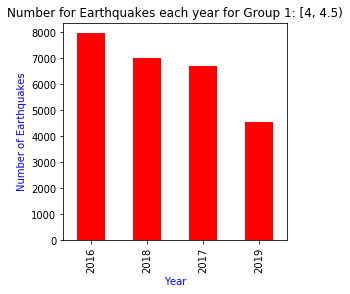

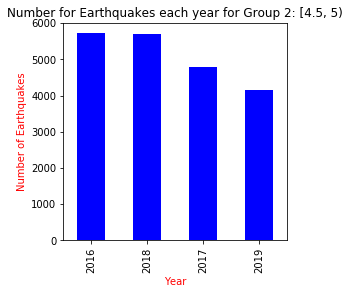

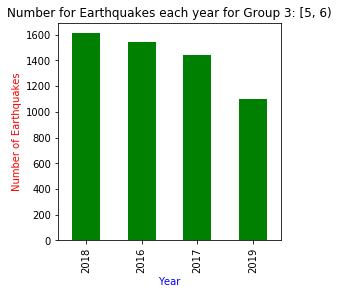

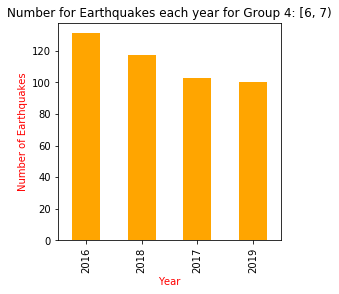

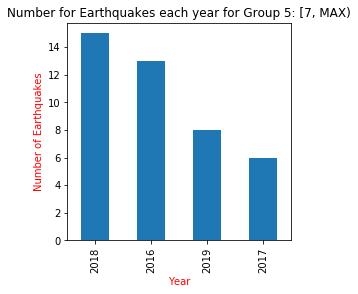

In [381]:
ax = group1Df['time'].str[:4].value_counts().plot(kind='bar',
                    figsize=(4,4),
                    title="Number for Earthquakes each year for Group 1: [4, 4.5)",
                    color='red')
ax.set_xlabel("Year", color="blue")
ax.set_ylabel("Number of Earthquakes", color="blue")
plt.show()

ax = group2Df['time'].str[:4].value_counts().plot(kind='bar',
                    figsize=(4,4),
                    title="Number for Earthquakes each year for Group 2: [4.5, 5)",
                    color='blue')
ax.set_xlabel("Year", color="red")
ax.set_ylabel("Number of Earthquakes", color="red")
plt.show()

ax = group3Df['time'].str[:4].value_counts().plot(kind='bar',
                    figsize=(4,4),
                    title="Number for Earthquakes each year for Group 3: [5, 6)", 
                    color='green')
ax.set_xlabel("Year", color="blue")
ax.set_ylabel("Number of Earthquakes", color="red")
plt.show()

ax = group4Df['time'].str[:4].value_counts().plot(kind='bar',
                    figsize=(4,4),
                    title="Number for Earthquakes each year for Group 4: [6, 7)", 
                    color='orange')
ax.set_xlabel("Year", color="red")
ax.set_ylabel("Number of Earthquakes", color="red")
plt.show()

ax = group5Df['time'].str[:4].value_counts().plot(kind='bar',
                    figsize=(4,4),
                    title="Number for Earthquakes each year for Group 5: [7, MAX)")
ax.set_xlabel("Year", color="red")
ax.set_ylabel("Number of Earthquakes", color="red")
plt.show()

############## OR #######################

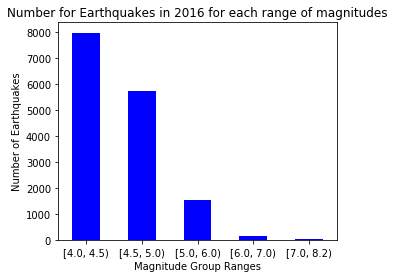

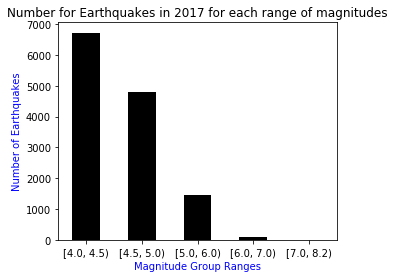

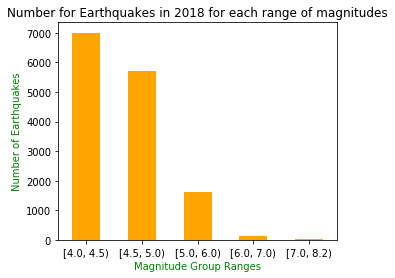

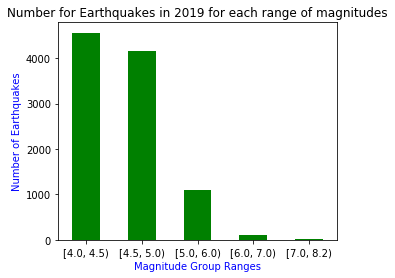

In [382]:
earthquake2016Data = earthquakeDf[earthquakeDf['time'].str[:4]=='2016']
earthquake2017Data = earthquakeDf[earthquakeDf['time'].str[:4]=='2017']
earthquake2018Data = earthquakeDf[earthquakeDf['time'].str[:4]=='2018']
earthquake2019Data = earthquakeDf[earthquakeDf['time'].str[:4]=='2019']

out = pd.cut(earthquake2016Data['mag'], 
             bins=[4, 4.5, 5, 6, 7, 8.2], include_lowest=True, right=False)
ax = out.value_counts(sort=False).plot.bar(rot=0, color="b", 
                figsize=(5,4), 
                title="Number for Earthquakes in 2016 for each range of magnitudes")
ax.set_xlabel("Magnitude Group Ranges", color="black")
ax.set_ylabel("Number of Earthquakes", color="black")
plt.show()

out = pd.cut(earthquake2017Data['mag'], 
             bins=[4, 4.5, 5, 6, 7, 8.2], include_lowest=True, right=False)
ax = out.value_counts(sort=False).plot.bar(rot=0, color="black", 
                figsize=(5,4), 
                title="Number for Earthquakes in 2017 for each range of magnitudes")
ax.set_xlabel("Magnitude Group Ranges", color="b")
ax.set_ylabel("Number of Earthquakes", color="b")
plt.show()

out = pd.cut(earthquake2018Data['mag'], 
             bins=[4, 4.5, 5, 6, 7, 8.2], include_lowest=True, right=False)
ax = out.value_counts(sort=False).plot.bar(rot=0, color="orange", figsize=(5,4), 
            title="Number for Earthquakes in 2018 for each range of magnitudes")
ax.set_xlabel("Magnitude Group Ranges", color="g")
ax.set_ylabel("Number of Earthquakes", color="g")
plt.show()

out = pd.cut(earthquake2019Data['mag'], 
             bins=[4, 4.5, 5, 6, 7, 8.2], include_lowest=True, right=False)
ax = out.value_counts(sort=False).plot.bar(rot=0, color="g", figsize=(5,4), 
            title="Number for Earthquakes in 2019 for each range of magnitudes")
ax.set_xlabel("Magnitude Group Ranges", color="b")
ax.set_ylabel("Number of Earthquakes", color="b")
plt.show()

# 7) Find the 10 countries with the highest number of earthquakes (30 points) (Note: Yes, this is only countries, not full place)

In [383]:
# Getting All Places values with ONLY Country name
countriesDf = earthquakeDf['place'].str.extract(r', (.+?)$', expand=True)
countriesDf['place'] = earthquakeDf['place'].str.extract(r', (.+?)$', expand=True).values

# Getting Counts of Each Country/place
countryCountDf = countriesDf.groupby('place').count()
countryCountDf['count'] = countriesDf.groupby('place').count().values

# Sorting Counts in Descending order 
countrySortDf = countryCountDf.sort_values(by='count', ascending = False).head(10)
print("Top 10 countries with Highest number of Earthquakes & their counts:::")
countrySortDf['count']

Top 10 countries with Highest number of Earthquakes & their counts:::


place
Indonesia           6554
Japan               3414
Papua New Guinea    3085
Fiji                2525
New Zealand         2389
Chile               2285
Philippines         2084
Alaska              1834
Russia              1756
Tonga               1565
Name: count, dtype: int64

# 8) Analyze the distribution of the Earthquake magnitudes. This is, make a histogram of the Earthquake count versus magnitude. Make sure to use a Logarithmic scale. What sort of relationship do you see? (20 points) Please add labels and colors to the plot.

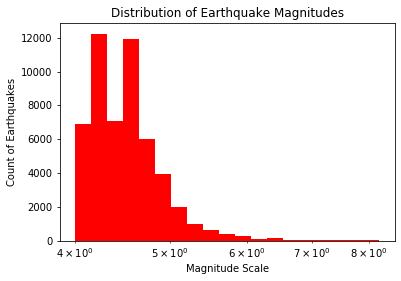

In [384]:
import numpy as np

# Applying bins based on Min & Max values of Magnitudes
logbins = np.logspace(np.log10(4.0),np.log10(8.2), 20)

# Plotting histogram
plt.hist(earthquakeDf['mag'], bins=logbins, color="red")

# Show Logarithmic scale
plt.xscale('log')
#plt.yscale('log')

# Applying title & labels
plt.title('Distribution of Earthquake Magnitudes')
plt.xlabel('Magnitude Scale')
plt.ylabel('Count of Earthquakes')

plt.show()

The above histogram shows a "Right-Skewed" distribution with maximum number of earthquakes occured with lower magnitudes ranging from 4.0 to apprimately 4.8. Count of earthquakes gradually decreased with increase in Magnitude scales from 4.8 and above. Max number of earthquakes occured at a scale of approximately 4.2 and 4.8 with counts of 12,000 and little <12,000 respectively. There were very few earthquakes i.e. less than 1000 with a magnitude of 8.0 and higher.

# 9) Analyze the distribution of the Earthquake depths. This is, make a histogram of the Earthquake count versus depth. Make sure to use a Logarithmic scale. What sort of relationship do you see? (20 points) Please add labels and colors to the plot.

count    52832.000000
mean        94.220178
std        147.893199
min         -0.930000
25%         10.000000
50%         33.885000
75%        106.130000
max        690.950000
Name: depth, dtype: float64


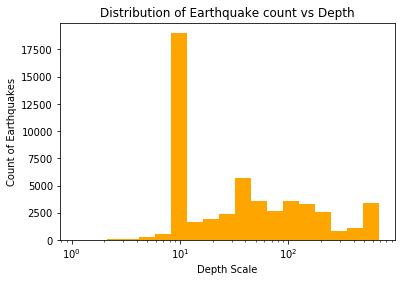

In [385]:
# Depths details
print(earthquakeDf['depth'].describe())

# Applying bins based on Min & Max values of Depth
logbins = np.logspace(-np.log10(0.93),np.log10(691), 20)

# Plotting histogram
plt.hist(earthquakeDf['depth'], bins=logbins, color="orange")

# Show Logarithmic scale
plt.xscale('log')
#plt.yscale('log')

# Applying title & labels
plt.title('Distribution of Earthquake count vs Depth')
plt.xlabel('Depth Scale')
plt.ylabel('Count of Earthquakes')

plt.show()

From the above histogram distribution, I understand that maximum earthquakes occured with a depth of approx. log10 i.e. 10 with a count of more than 17,500. Rest of the earthquakes depths ranges between 20 to 691 has counts from 1000 to 5000. We can see a somewhat similar to normal distribution for depths graeter than 10.

# 10) Visualize the locations of earthquakes by making a scatterplot of their latitude and longitude. (20 points) Please add labels and colors to the plot.

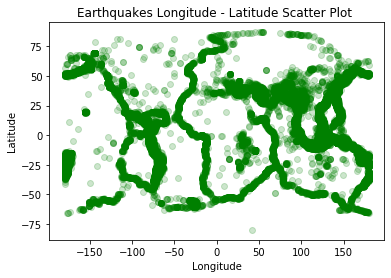

In [386]:
x = earthquakeDf['longitude']
y = earthquakeDf['latitude']

# Scatter Plot
plt.scatter(x, y, color='green', alpha=0.2)
plt.title('Earthquakes Longitude - Latitude Scatter Plot ')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

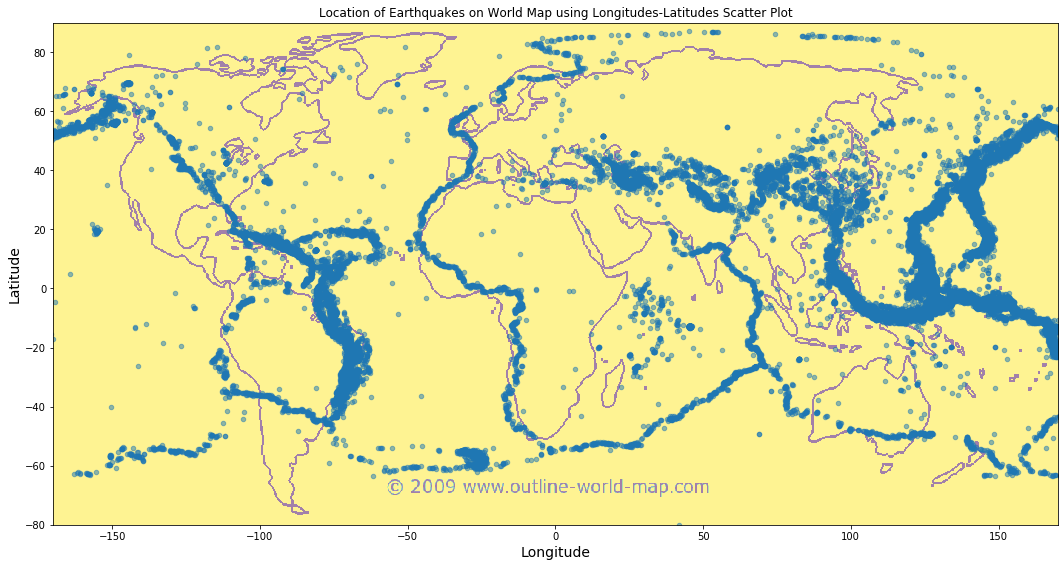

In [387]:
import matplotlib.image as mpimg

world_img=mpimg.imread('world.png')

# Plotting Scatter Plot of Longitude and Latitude
ax = earthquakeDf.plot(kind="scatter", x="longitude", y="latitude", 
    colorbar=False, alpha=0.5, figsize=(18,18))

# Showing World map image behind the Scatter plot
plt.imshow(world_img, extent=[-170, 170, -80, 90], alpha=0.5)

# Show Title & Labels
plt.title('Location of Earthquakes on World Map using Longitudes-Latitudes Scatter Plot')
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)
plt.show()

From the above Scatterplot and Scatterplot on top of World map based on Logitudes and Latitudes, we can observe that most of the earthquakes occured near the coastal areas of all continents. There is high density of earthquakes on North West coastal areas of South America, like Brazil are most affected. Similarly, Western coastal areas of South Africa is also highly affected with earthquakes. Other highly dense scatter plot can be seen near China, Soth Korea, Japan and water bodies of Pacific Ocean.

# Graduate student questions: 11) Using the US package (https://pypi.org/project/us/), clean the dataset you used previously to only have data from the USA . You need to create a function that accommodates this. (20 points)

In [388]:
import us

def getUSEarthquakeData(earthquakeData):
    
    earthquakeData['state'] = earthquakeData['place'].str.extract(r', (.+?)$', expand=True)
    earthquakeData['state'] = earthquakeData['state'].fillna("") # fill null/empty data with zeros
    
    usaEarthquakeDf = earthquakeData[earthquakeData.apply(lambda x: us.states.lookup(x['state'])!=None , axis=1)]
    return usaEarthquakeDf

usaEarthquakeData = getUSEarthquakeData(earthquakeDf)
print(usaEarthquakeData.head())
print(usaEarthquakeData.shape)

                        time  latitude  longitude   depth  mag magType   nst  \
1   2016-12-30T21:08:34.060Z   13.3141   145.9761   10.00  4.9      mb   0.0   
17  2016-12-30T11:21:48.050Z   18.4974   145.5116  214.66  4.3      mb   0.0   
81  2016-12-28T12:46:44.970Z   52.8468  -162.9064   29.30  4.3      mb   0.0   
86  2016-12-28T09:13:47.243Z   38.3777  -118.8957    8.80  5.5      ml  33.0   
87  2016-12-28T08:22:12.208Z   38.3904  -118.8972   12.20  5.6      ml  43.0   

       gap   dmin     rms  ...                                          place  \
1    63.00  1.111  0.9700  ...         119km ESE of Yigo Mayor's Office, Guam   
17  117.00  3.249  0.8600  ...  34km SSW of Agrihan, Northern Mariana Islands   
81    0.00  0.000  0.9900  ...                  225km S of False Pass, Alaska   
86   48.58  0.129  0.2187  ...                   28km SW of Hawthorne, Nevada   
87   42.44  0.123  0.1913  ...                   26km SW of Hawthorne, Nevada   

          type horizontalError d

# 12) Using the cleaned US-only version of your dataset answer the following questions (30 points total):

# 12) a) Find the top 10 US states where the strongest earthquakes occurred (10 points)

In [389]:
# Sort by Strongest Earthquakes with descending magnitudes
strongestUSAEqDf = usaEarthquakeData.sort_values(by = 'mag', ascending = False)
# Drop duplicate states
strongestUSAEqDf.drop_duplicates(subset='state', inplace=True)

#Pick DISTINCT top 10 states with strongest earthquakes
top10USStatesStrongEq = strongestUSAEqDf['place'].str.extract(r', (.+?)$', expand=True).head(10)

print("Top 10 USA States with Strongest Earthquakes:::")
print(top10USStatesStrongEq)

Top 10 USA States with Strongest Earthquakes:::
                              0
13767                    Alaska
7093   Northern Mariana Islands
9994                     Hawaii
1324                 California
3047                         CA
989                      Oregon
216                 Puerto Rico
6740                    Montana
5343                   Oklahoma
1679                       Guam


# 12) b) On a per-year basis, use a bar chart to plot the number of earthquakes for each of the following magnitude groups ranges: Group 1: [4,4.5), Group 2: [4.5,5), Group 3: [5,6), Group 4: [6,7), Group 5: (7,MAX]. Pay close attention to the group ranges. (10 points) Please add labels and colors to the plot.

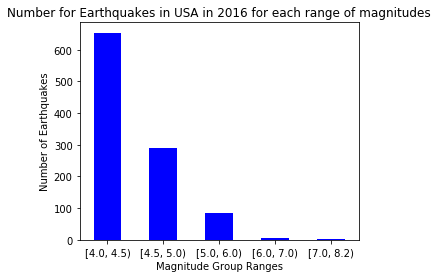

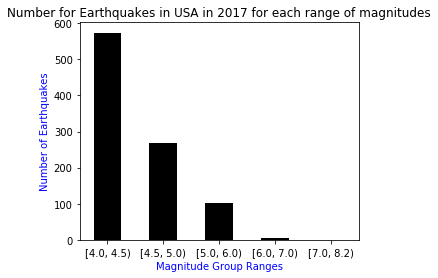

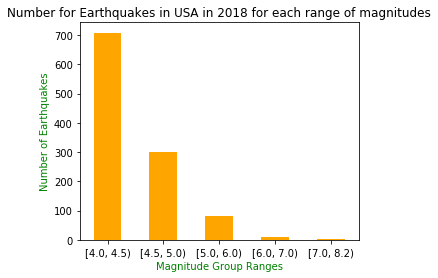

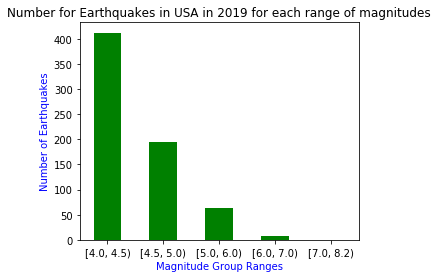

In [390]:
usearthquake2016Data = usaEarthquakeData[usaEarthquakeData['time'].str[:4]=='2016']
usearthquake2017Data = usaEarthquakeData[usaEarthquakeData['time'].str[:4]=='2017']
usearthquake2018Data = usaEarthquakeData[usaEarthquakeData['time'].str[:4]=='2018']
usearthquake2019Data = usaEarthquakeData[usaEarthquakeData['time'].str[:4]=='2019']

out = pd.cut(usearthquake2016Data['mag'], bins=[4, 4.5, 5, 6, 7, 8.2], include_lowest=True, right=False)
ax = out.value_counts(sort=False).plot.bar(rot=0, color="b", figsize=(5,4), 
                                           title="Number for Earthquakes in USA in 2016 for each range of magnitudes")
ax.set_xlabel("Magnitude Group Ranges", color="black")
ax.set_ylabel("Number of Earthquakes", color="black")
plt.show()

out = pd.cut(usearthquake2017Data['mag'], bins=[4, 4.5, 5, 6, 7, 8.2], include_lowest=True, right=False)
ax = out.value_counts(sort=False).plot.bar(rot=0, color="black", figsize=(5,4), 
                                           title="Number for Earthquakes in USA in 2017 for each range of magnitudes")
ax.set_xlabel("Magnitude Group Ranges", color="b")
ax.set_ylabel("Number of Earthquakes", color="b")
plt.show()

out = pd.cut(usearthquake2018Data['mag'], bins=[4, 4.5, 5, 6, 7, 8.2], include_lowest=True, right=False)
ax = out.value_counts(sort=False).plot.bar(rot=0, color="orange", figsize=(5,4), 
                                           title="Number for Earthquakes in USA in 2018 for each range of magnitudes")
ax.set_xlabel("Magnitude Group Ranges", color="g")
ax.set_ylabel("Number of Earthquakes", color="g")
plt.show()

out = pd.cut(usearthquake2019Data['mag'], bins=[4, 4.5, 5, 6, 7, 8.2], include_lowest=True, right=False)
ax = out.value_counts(sort=False).plot.bar(rot=0, color="g", figsize=(5,4), 
                                           title="Number for Earthquakes in USA in 2019 for each range of magnitudes")
ax.set_xlabel("Magnitude Group Ranges", color="b")
ax.set_ylabel("Number of Earthquakes", color="b")
plt.show()

# 12) c) Visualize the locations of earthquakes by making a scatterplot of their latitude and longitude. Overlay a US map on top of this plot to match the locations. (20 points) Please add labels and colors to the plot.

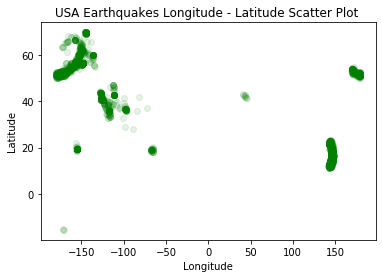

In [391]:
x = usaEarthquakeData['longitude']
y = usaEarthquakeData['latitude']

# Scatter Plot
plt.scatter(x, y, color='green', alpha=0.1)
plt.title('USA Earthquakes Longitude - Latitude Scatter Plot ')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

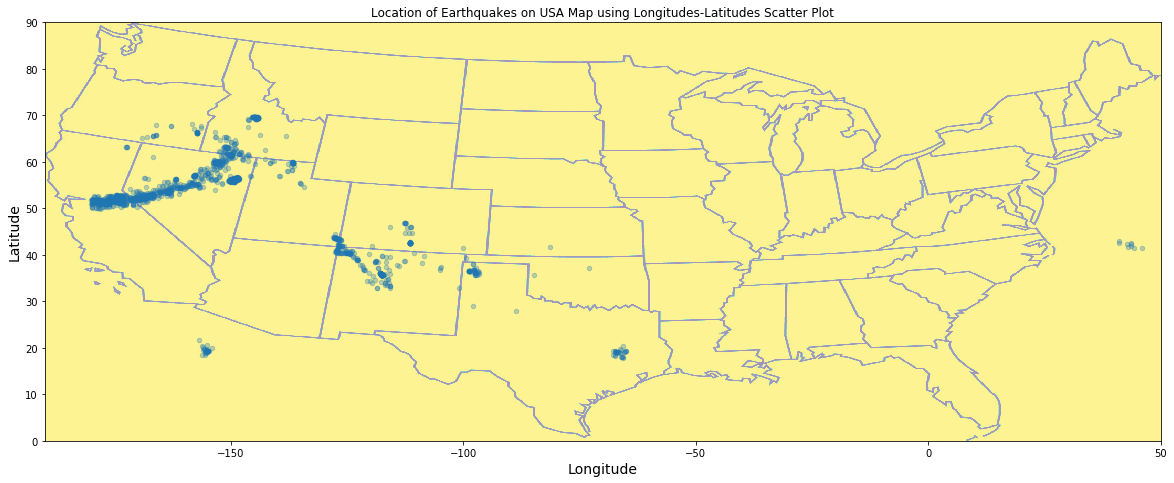

In [392]:
us_img = mpimg.imread('usa2.jpg')

# Plotting Scatter Plot of Longitude and Latitude
ax = usaEarthquakeData.plot(kind="scatter", x="longitude", y="latitude", 
    colorbar=False, alpha=0.3, figsize=(20,20))

# Showing USA map image behind the Scatter plot
plt.imshow(us_img, extent=[-190, 50, 0, 90], alpha=0.5)

# Show Title & Labels
plt.title('Location of Earthquakes on USA Map using Longitudes-Latitudes Scatter Plot')
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)
plt.show()

From the above Scatterplot and Scatterplot on top of USA map based on Logitudes and Latitudes of USA Earthquake data, we can observe that most of the earthquakes occured near California, Nevada, Oklahoma. There is high density of earthquakes in California and Nevada.